<a href="https://colab.research.google.com/github/apoorvashete/MovieSuccesRatePrediction/blob/master/Movie_Success_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Success Rate Prediction using Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# Exploratory Analysis
Load dataset and gwt familiar with the data

In [ ]:
data = pd.read_csv('movie_success_rate_data.csv', index_col=False)
data=data.dropna(axis=0, how='any')
data.head(5) #returns initial 5 rows

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,333.13,76.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,126.46,65.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,138.12,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,270.32,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,325.02,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(data.shape) #returns (no of rows, no of cols)

(838, 33)


In [ ]:
data.info() #returns column datatypes, non null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 837
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    float64
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [ ]:
data.describe() # returns statistical details

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,0.079952,0.298329,0.150358,0.500000,0.057279,0.109785,0.029833,0.103819,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,0.470692,0.454573,0.225558,0.271381,0.457798,0.357635,0.500299,0.232514,0.312809,0.170228,0.305207,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Data for Evaluation

In [ ]:
#Data for Evaluation
X = data[data.columns[6:32]]
Y=data.iloc[:,-1]

Check the correlations between the attributes. 
From the output graph below, 
1. Red boxes(around the diagonal) - attributes are correlated with each other
2. Yellow, Green boxes - some moderate correlation
3. Blue boxes - negative correlations(one increases, other decreases)

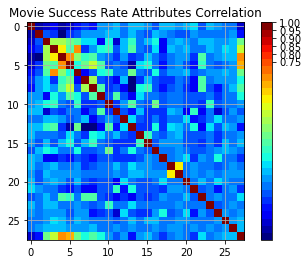

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Movie Success Rate Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

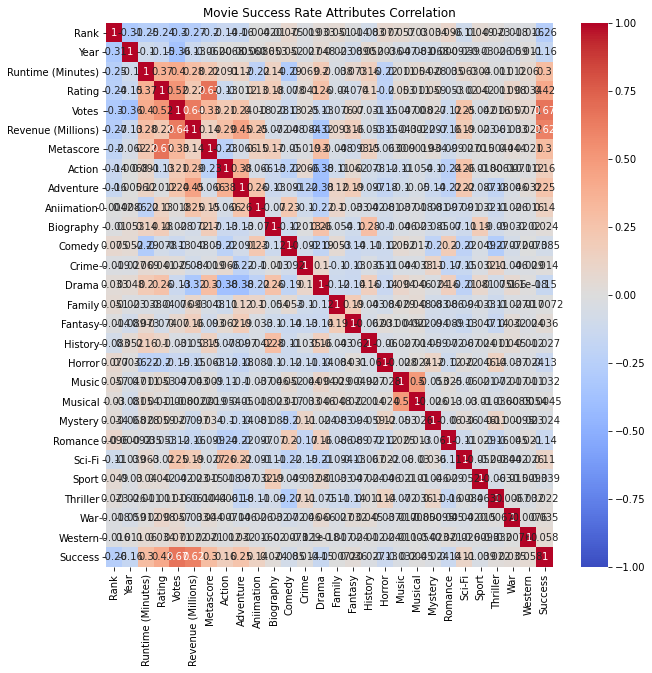

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);
plt.title('Movie Success Rate Attributes Correlation')
plt.show()

#Splitting Train and Test Data

Split data into train and test sets (will use 30% of the data as test set)

In [ ]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Training - Random Forest

In [ ]:
#Model and Training - Random Forest
randomforest_model = RandomForestClassifier(n_estimators=60)
randomforest_model.fit(X_train, Y_train)
y_pred_rf = randomforest_model.predict(X_test)

#Model Evaluation for Random Forest

In [ ]:
#Model Evaluation for Random Forest
conf_mat_rf = confusion_matrix(Y_test,y_pred_rf)
acc_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test,y_pred_rf)
recall_rf = recall_score(Y_test,y_pred_rf)
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(Y_test, y_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)

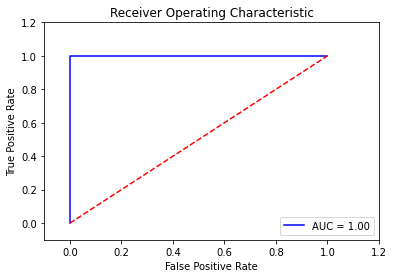

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'b',
label='AUC = %0.2f'% roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Results

In [ ]:
#Print Results
print('Confusion Matrix for Random Forest is :')
print(conf_mat_rf)
#print('\nAccuracy for Random Forest is :')
#print(acc_rf)
#print('\nPrecision is :')
#print(precision_rf)
#print('\nRecall is: ')
#print(recall_rf)

Confusion Matrix for Random Forest is :
[[106   0]
 [  0  20]]


In [ ]:
tp=106
tn=20
fp=0
fn=0
acc = (tn+tp)/(tn+tp+fp+fn) #Accuracy
pre = tp / (tp+fp) #Precision
sen = tp/(tp+fn) #Sensitivity or Recall
f1 = 2*(pre*sen)/(pre+sen) #F1 Score
spec = tn/ (tn+fp) #Specificity
FDR = fp / (fp+tp) #False Discovery Rate
FOR = fn / (fn+tn) #False Ommission Rate

print('Accuracy : ',acc, '\nPrecision : ',pre,'\nSensitivity/ Recall : ',sen, '\nF1 Score : ',f1,'\nSpecificity : ',spec, '\nFalse Discovery Rate : ',FDR, '\nFalse Ommission Rate : ',FOR)

Accuracy :  1.0 
Precision :  1.0 
Sensitivity/ Recall :  1.0 
F1 Score :  1.0 
Specificity :  1.0 
False Discovery Rate :  0.0 
False Ommission Rate :  0.0
